In [1]:
# import necessary libraries

import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix


In [2]:
# Load Mnist dataset

(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.mnist.load_data()

In [5]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [51]:
pd.DataFrame(ytrain).value_counts(normalize=True)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
dtype: float64

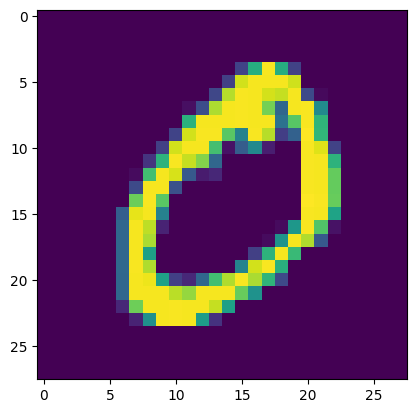

In [57]:
#  Viewing one of the image

plt.imshow(xtrain[1])

In [52]:
# This seems to be a balanced dataset

In [9]:
# Reshaping train dataset
xtrain_reshape=pd.DataFrame(xtrain.reshape(60000,-1))
xtest_reshape=pd.DataFrame(xtest.reshape(10000,-1))

In [10]:
# one hot encod the target variables
ytrain_coded=pd.get_dummies(ytrain)
ytest_coded=pd.get_dummies(ytest)

In [18]:
# Model Building

model=tf.keras.models.Sequential([
tf.keras.layers.Dense(units=64,activation="relu",input_shape=(len(xtrain_reshape.columns),)),
tf.keras.layers.Dense(units=32,activation="relu"),
tf.keras.layers.Dense(units=16,activation="relu"),
tf.keras.layers.Dense(units=8,activation="relu"),
tf.keras.layers.Dense(units=len(ytrain_coded.columns),activation="softmax")])

In [25]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [27]:
model_history=model.fit(xtrain_reshape,ytrain_coded,batch_size=32,epochs=30,validation_data=(xtest_reshape,ytest_coded))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0341 - accuracy: 0.9909 - val_loss: 0.1656 - val_accuracy: 0.9707
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0335 - accuracy: 0.9909 - val_loss: 0.1732 - val_accuracy: 0.9686
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9896 - val_loss: 0.1610 - val_accuracy: 0.9679
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9912 - val_loss: 0.1580 - val_accuracy: 0.9693
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0315 - accuracy: 0.9913 - val_loss: 0.1622 - val_accuracy: 0.9718
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0335 - accuracy: 0.9912 - val_loss: 0.1610 - val_accuracy: 0.9704
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.1663 - val_accuracy:

In [32]:
preds=model.predict(xtest_reshape)

In [33]:
preds=np.argmax(preds,axis=1)

In [45]:
#   Classification report

print(classification_report(ytest,preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.95      0.96       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [47]:
confusion_matrix(ytest,preds)

array([[ 971,    1,    0,    0,    0,    1,    3,    1,    3,    0],
       [   0, 1121,    1,    1,    3,    0,    1,    1,    7,    0],
       [   6,    5,  996,    3,    2,    0,    3,    4,   13,    0],
       [   0,    0,   17,  978,    0,    4,    0,    4,    4,    3],
       [   1,    0,    3,    0,  967,    0,    7,    1,    1,    2],
       [   4,    1,    0,   17,    0,  847,    7,    2,    8,    6],
       [   6,    2,    0,    0,    2,    4,  942,    0,    2,    0],
       [   2,    4,   11,    5,    7,    2,    0,  984,    2,   11],
       [   4,    1,    4,    5,    3,    3,    2,    3,  945,    4],
       [   7,    7,    0,   11,   24,    3,    0,    9,    8,  940]],
      dtype=int64)

In [53]:
#  Testing Accuracy

print(accuracy_score(ytest,preds))

0.9691
